#  <center> Taller  de Aprendizaje Automático </center>
##  <center> Taller 1: Titanic  </center>

En esta actividad se trabajará con el dataset [Titanic](https://www.kaggle.com/c/titanic/overview) disponible en Kaggle. El objetivo es predecir si un pasajero sobrevivirá a partir de atributos personales. La descripción de los atributos se encuentra en la misma [página](https://www.kaggle.com/c/titanic/data) en que se pueden bajar los datos. 

## Objetivos Generales del Taller
 - Abordar un problema de aprendizaje automático de punta a punta
 - Familiarizarse con la biblioteca **pandas** para levantar y explorar los datos
 - Familiarizarse con los **pipelines** de **scikit-learn** como una forma de resolver un problema en forma ordenada.

## Formas de trabajo 

Se podrá elegir entre dos formas de trabajo: instalación local o Colab. Para trabajar en clase Colab es completamente adecuado. Para ejecutar corridas que demanden mucho tiempo (por ejemplo, búsqueda de hiperparámetros) puede ser conveniente trabajar localmente. A continuación se explica cómo proceder en cada caso. Cualquiera sea la elección se recomienda trabajar con `scikit-learn>1.1.0`.

#### Opción 1: Trabajar localmente

##### Ambiente de Trabajo

Deberá trabajar en su propio ambiente de desarrollo. Ej: **conda environment**.  En caso de no contar con uno deberá crearlo ejecutando la siguiente línea de comando: 

`conda create -n TAA-py310 python=3.10`  

Una vez creado se procede a activarlo: 

`conda activate TAA-py310`  

Una vez activado se instalan en el entorno los paquetes que se utilizaran: 

`pip install numpy matplotlib pandas "scikit-learn>1.1.0" notebook`   

También se utilizarán extensiones del Jupyter Notbook:

`pip install jupyter_contrib_nbextensions`

Una vez finalizada la instalación abra el Jupyter Notebook:

`jupyter-notebook`

Una vez abierto el Jupyter Notebook en la pestaña **Nbextensions** active las siguientes extensiones:

'Collapsible Headings', 'Exercise2', 'Variable Inspector'. 

Los paquetes faltantes se pueden instalar desde el notebook haciendo:    

`!pip install paquete_faltante`

In [115]:
!pip install paquete_faltante

ERROR: Could not find a version that satisfies the requirement paquete_faltante (from versions: none)
ERROR: No matching distribution found for paquete_faltante


##### Configuración de Kaggle

Para obtener los datos de Kaggle primero se instalará la librería de **Kaggle**

In [116]:
!pip install kaggle

A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Account" y haga clic en "Create new API token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

Cree (en caso de no existir) la carpeta `.kaggle`. Modifique *nombre_usuario* por el nombre del usuario donde está trabajando.

In [3]:
!mkdir C:\Users\sebas\.kaggle

Un sous-r‚pertoire ou un fichier C:\Users\sebas\.kaggle existe d‚j….


Mueva el archivo descargado a la carpeta creada. 

In [4]:
#Comando en Windows
!move C:\Users\sebas\Downloads\kaggle.json C:\Users\sebas\.kaggle

#Comando en Linux
# !mv C:\Users\nombre_usuario\Downloads\kaggle.json C:\Users\nombre_usuario\.kaggle

Le fichier sp‚cifi‚ est introuvable.


##### Descarga de datos disponibles en Kaggle

Vaya a la competición de [Titanic](https://www.kaggle.com/c/titanic) en Kaggle y presione **Join Competition**. Si los pasos realizados anteriormente fueron exitosos, el comando a continuacion debería mostrar una lista de todas las competiciones activas de Kaggle. 

In [5]:
!kaggle competitions list

ref                                                                                           deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection                          2023-06-14 23:59:00  Featured         $1,000,000        912           False  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-10 23:59:00  Research           $200,000          0           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction                 2023-06-08 23:59:00  Research           $100,000        952           False  
https://www.kaggle.com/competitions/2023-kaggle-ai-report                                     2023-07-05 23:59:00  Analytics           $70,0

Luego, para descargar el dataset del Titanic:

In [6]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


Descomprima el archivo descargado:

In [7]:
# Forma 1
#!unzip titanic.zip

# Forma 2
import zipfile
with zipfile.ZipFile("titanic.zip","r") as zip_ref:
     zip_ref.extractall("./")

#### Opción 2:  Trabajar en *Colab*. 

Se puede trabajar en Google Colab. Para ello es necesario contar con una cuenta de **google drive** y ejecutar un notebook almacenado en dicha cuenta. De lo contrario, no se conservarán los cambios realizados en la sesión. En caso de ya contar con una cuenta, se puede abrir el notebook y luego ir a `Archivo-->Guardar una copia en drive`.  

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TAA-fing/TAA-2023/blob/main/talleres/taller1_titanic.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Google Colab</a>
  </td>
</table>

La siguiente celda monta el disco personal del drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Account" y haga clic en "Create new API token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

La siguiente celda realiza la configuración necesaria para obtener datos desde la plataforma Kaggle. Le solicitará que suba el archivo kaggle.json descargado anteriormente.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# El siguiente archivo solicitado es para habilitar la API de Kaggle en el entorno que está trabajando.
# Este archivo se descarga entrando a su perfíl de Kaggle, en la sección API, presionando donde dice: Create New API Token

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

ModuleNotFoundError: No module named 'google'

Una vez guardado el *token* se pueden descargar los datos, en este caso se bajarán los datos de la competencia *titanic*.

In [7]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


## Parte 1 - Carga de datos

#### Objetivos:

 - Levantar el conjunto de entrenamiento utilizando el método `read_csv()` de la biblioteca **pandas**. 
 - Explorar los métodos `head()`, `info()` y `describe()` para obtener información relevante de los datos. 

In [117]:
# Se importa la biblioteca pandas
import pandas as pd

# Se levantan los datos
data_train = pd.read_csv("train.csv")
train_df = pd.read_csv("train.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Parte 2 - Exploración con pandas

#### Objetivos:
 - Identificar el atributo a predecir 
 - Obtener el porcentaje de pasajeros del conjunto de entrenamiento que sobrevivió. ¿Es un problema de clases desbalanceadas? 
 - Identificar los atributos numéricos y categóricos.
 - En caso de contar con datos categóricos identifique las categorías.
 - Obtener el porcentaje de pasajeros dentro de cada categoría que sobrevivió. (e.g. Intente responder: ¿Qué porcentaje de mujeres sobrevivieron? ¿Qué porcentaje de pasajero de la clase Pclass 1 sobrevivieron?)
 - Identificar y cuantificar datos faltantes.


In [9]:
# Del data frame
data_train.describe()

#porcentaje de pasajeros del conjunto de entrenamiento que sobrevivió
data_train.Survived.mean()

# es un problema de clases desbalancedas porque el porcentaje de pasajeros que sobrevivio es de 0.38

column_names = data_train.columns.to_list()
print(column_names)

#atributos numéricos : PassengerId, Survived, Pclass, Age, Sibsp, Parch,Fare 
#atributos categóricos : Name, Sex (male,female), Ticket, Cabin, Embarked 

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
for column in data_train.columns:
    print(data_train.groupby([column]).Survived.mean())
    print()
    print()

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 891, dtype: float64


Survived
0    0.0
1    1.0
Name: Survived, dtype: float64


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Name
Abbing, Mr. Anthony                      0.0
Abbott, Mr. Rossmore Edward              0.0
Abbott, Mrs. Stanton (Rosa Hunt)         1.0
Abelson, Mr. Samuel                      0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    1.0
                                        ... 
de Mulder, Mr. Theodore                  1.0
de Pelsmaeker, Mr. Alfons                0.0
del Carlo, Mr. Sebastiano                0.0
van Billiard, Mr. Austin Blyler          0.0
van Melkebeke, Mr. Philemon              0.0
Name: Survived, Length: 891, dtype: float64


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.

In [10]:
#podemos ver que hay una corelacion imortante entre Sex y sovrevivencia
data_sex = data_train.groupby(['Sex']).Survived.mean()

In [11]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Ejercicio:
 - Filtrar datos en pandas utilizando `df.loc[..]`. (e.g. Intente obtener la información correspondiente al pasajero mayor a 60 años en Pclass 3 que sobrevivió)
 - Manipular columnas y filas de dataframes. (e.g. Genere un vector con las etiquetas del problema.)

**1)**

In [12]:
data_train.loc[(data_train['Age'] > 60) & (data_train['Pclass'] == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [13]:
data_train.loc[(data_train['Age'] > 60) & (data_train['Pclass'] == 3) & (data_train['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


**2)**

In [14]:
y_target = data_train['Survived']
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
y_target = data_train.loc[:, 'Survived']
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
column_names = data_train.columns.to_list()
print(column_names)

index_survived = column_names.index('Survived')
print(index_survived)

y_target = data_train.iloc[:,index_survived]
y_target

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Parte 3 - Descubrir y visualizar los datos para obtener información relevante.  


#### Objetivos:

 - Explore [métodos de visualización](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) con **pandas**. Para graficar con *pandas* es necesario importar *matplotlib*. Puede ser útil comparar los histogramas de cada clase contra los histogramas de supervivencia en cada clase. 
 - Estudie la correlación de las características con la etiqueta a predecir. Se sugiere utilizar el método `corr()`.
 - Concluya que factores tuvieron mayor incidencia en la supervivencia o no de un pasajero.

In [118]:
data_train['Sex']=data_train['Sex'].replace({'male':0,'female':1})
data_train['Embarked']=data_train['Embarked'].replace({'S':1,'Q':2, 'C':3})

In [18]:
data_train_survived = data_train.loc[(data_train['Survived'] == 1)]
df_survived = pd.DataFrame(data_train_survived)
df_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,3.0


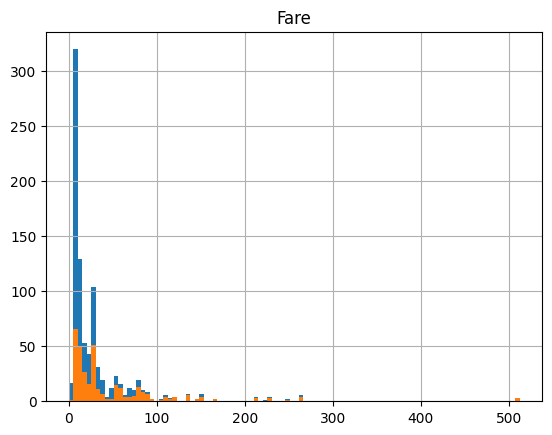

In [158]:
from matplotlib import pyplot as plt
#Hacemos histogramas de cada atributo para ver qué distribuciones tienen
for column in data_train.columns:
    if column=='Fare':
        data_train[column].hist(bins=100)
        df_survived[column].hist(bins=100)
        plt.title(column)
        plt.show()

<BarContainer object of 3 artists>

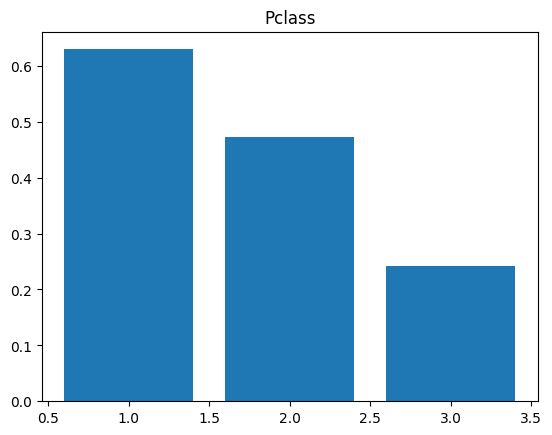

In [20]:
from matplotlib import pyplot as plt
data_pclass= data_train.groupby(['Pclass']).Survived.mean()

Pclass = [1, 2, 3]
freq = [0.629630, 0.472826, 0.242363]

# Créer l'histogramme
plt.title('Pclass')
plt.bar(Pclass, freq)

<BarContainer object of 7 artists>

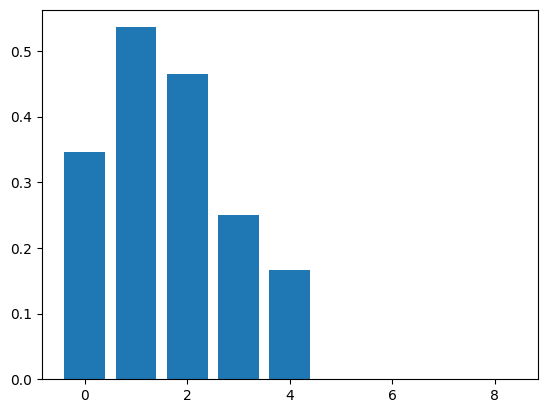

In [21]:
data_train.groupby(['SibSp']).Survived.mean()

SibSp = [0, 1, 2, 3, 4, 5, 8]
freq = [0.345395, 0.535885, 0.464286, 0.250000, 0.166667, 0, 0]

# Créer l'histogramme
plt.bar(SibSp, freq)

<BarContainer object of 7 artists>

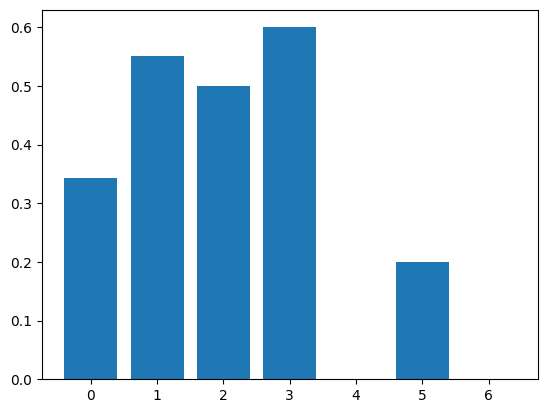

In [22]:
data_train.groupby(['Parch']).Survived.mean()

Parch = [0, 1, 2, 3, 4, 5, 6]
freq = [0.343658, 0.550847, 0.500000, 0.600000, 0.000000, 0.200000, 0.000000]

# Créer l'histogramme
plt.bar(Parch, freq)

  Embarked      freq
0        C  0.553571
1        Q  0.389610
2        S  0.336957


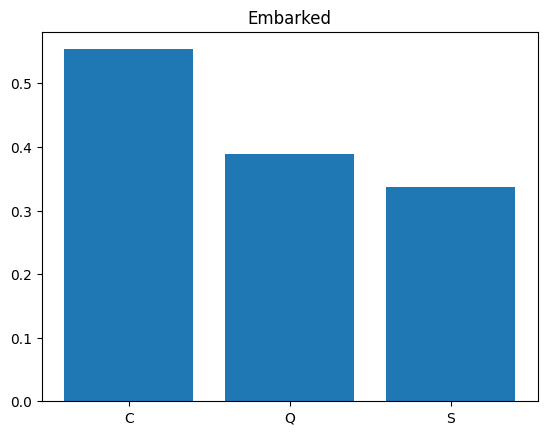

In [23]:
data_train.groupby(['Embarked']).Survived.mean()

data_embarked = {'Embarked' : ['C', 'Q', 'S'],'freq': [0.553571, 0.389610, 0.336957]}
df = pd.DataFrame(data_embarked)
print(df)

plt.bar(df['Embarked'], df['freq'])
plt.title('Embarked')
plt.show()

      Sex      freq
0    male  0.188908
1  female  0.742038


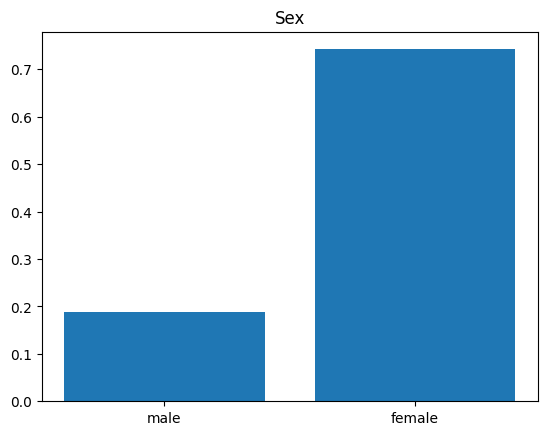

In [24]:
data_train.groupby(['Sex']).Survived.mean()

data_sex = {'Sex' : ['male', 'female'],'freq': [ 0.188908, 0.742038]}
df = pd.DataFrame(data_sex)
print(df)

plt.bar(df['Sex'], df['freq'])
plt.title('Sex')
plt.show()

In [25]:
data_train.groupby(['Sex']).Survived.mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [26]:
print(column_names)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [29]:
corr_matrix = data_train.corr()
corr_matrix["Survived"].sort_values()
#hay una correlacion importante entre Pclass y survived y entre Fare y Survived.

C:\Users\sebas\AppData\Local\Temp\ipykernel_18732\411222003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_train.corr()


Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.169718
Fare           0.257307
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

In [27]:
data_frame_age_survived = data_train.loc[:, ['Survived', 'Age']]
data_frame_age_survived.corr()['Age'][0]

-0.07722109457217756

## Parte 4 - Un Primer Pipeline 

#### Objetivos:

- Construir un **pipeline** que realice el preprocesamiento de los datos necesario para que éstos puedan ser utilizados por un clasificador de *sklearn*. Dicho preprocesamiento deberá en primera instancia realizar las siguientes tareas:

    1. Descartar los atributos *Cabin*, *Name* y *Ticket*.
    2. Rellenar datos faltantes con algún criterio elegido

In [28]:
train_df.head()

train_df["Embarked"].value_counts()
train_df["Sex"].value_counts()
train_df["SibSp"].value_counts()
train_df["Parch"].value_counts()
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the numeric columns and the categorical columns
numeric_cols = ['Age', 'Fare','Parch', 'SibSp']
cat_cols = ['Pclass', 'Sex', 'Embarked']

# Define the transformers for the numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define the column transformer to apply the different transformers to the different columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', cat_transformer, cat_cols)
])

# Define the pipeline with the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [22]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Fare', 'Parch',
                                                   'SibSp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])]))])

#### Ejercicio:
 - Acceda a los elementos del pipeline.  

Para acceder a las distintas transformaciones se usa `named_transformers_` y para acceder a los steps de cada transformación `named_steps`

In [23]:
pipeline.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Fare', 'Parch',
                                                   'SibSp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked

In [24]:
pipeline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['Age', 'Fare', 'Parch', 'SibSp']),
                                 ('cat',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('encoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['Pclass', 'Sex', 'Embarked'])])}

In [25]:
pipeline.named_steps['preprocessor']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Age', 'Fare', 'Parch', 'SibSp']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [26]:
df = train_df.copy()
train_df.head()
data_transformed= pipeline.fit_transform(df)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [27]:
data_transformed

array([[22.        ,  7.25      ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        , 71.2833    ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  7.925     ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765, 23.45      ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        , 30.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  7.75      ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

## Parte 5 - Un Segundo Pipeline

#### Objetivos:

 - Realizar un **pipeline** que se quede como único atributo el género del pasajero. 

In [11]:
# Define the numeric columns and the categorical columns
cat_cols2 = ['Sex']

# Define the transformers for the numeric and categorical columns

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define the column transformer to apply the different transformers to the different columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols2)
])

# Define the pipeline with the preprocessor and the classifier
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [31]:
pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex'])]))])

In [30]:
df2 = train_df.copy()
data_transformed2= pipeline2.fit_transform(df)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Parte 6 - Clasificación con Regresión Logística

#### Objetivos:
 - Con los datos procesados por los pipelines de la Parte 4 y Parte 5 entrenar un modelo de *Regresión Logística* con parámetros por defecto y estimar el desempeño mediante validación cruzada 5-folds.
 - Observe los desempeños obtenidos. ¿Qué puede decir sobre los datos? ¿Y sobre el modelo?

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Datos solo num

In [320]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [321]:
X_train = data_train.drop(['Survived'], axis=1)
y_train = data_train['Survived']

### Datos cat y num

In [318]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

### Pipeline 1

In [15]:
X_train_transformed = pipeline.fit_transform(X_train)

In [16]:
log_reg = LogisticRegression(max_iter=1000).fit(X_train_transformed,y_train) 

In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_transformed, y_train,
scoring="accuracy", cv=5)
print(np.mean(scores))

0.7935095097608437


### pipeline 2

In [18]:
X_train_transformed2 = pipeline2.fit_transform(X_train)

In [19]:
log_reg2 = LogisticRegression(max_iter=1000).fit(X_train_transformed2,y_train) 

In [20]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(log_reg2, X_train_transformed2, y_train,
scoring="accuracy", cv=5)
print(np.mean(scores2))

0.7867365513778168


## Parte 7 - Busqueda de Hiperparámetros

#### Objetivos:
 - Utilizar *Grid Search* para encontrar el valor óptimo del parámetro *C* del mejor clasificador de *Regresión Logística* obtenido de la parte anterior. 

### Pipeline 1

In [293]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [2,3,4]}

# train across 5 folds
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Obtenir les meilleurs paramètres et score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Évaluer les performances sur l'ensemble de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_
test_score = best_model.score(X_val_transformed, y_val)

print("Meilleurs paramètres:", best_params)
print("Meilleur score (validation croisée):", best_score)
print("Score sur l'ensemble de val:", test_score)

Meilleurs paramètres: {'C': 2}
Meilleur score (validation croisée): 0.7871428571428571
Score sur l'ensemble de val: 0.837696335078534


### Pipeline 2 

In [294]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [2,3,4]}

# train across 5 folds
grid_search = GridSearchCV(log_reg2, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train_transformed2, y_train)

# Obtenir les meilleurs paramètres et score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Évaluer les performances sur l'ensemble de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_
test_score = best_model.score(X_val_transformed2, y_val)

print("Meilleurs paramètres:", best_params)
print("Meilleur score (validation croisée):", best_score)
print("Score sur l'ensemble de val:", test_score)

Meilleurs paramètres: {'C': 2}
Meilleur score (validation croisée): 0.7857142857142858
Score sur l'ensemble de val: 0.7905759162303665


### Pipeline 3

In [180]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [1.4,1.5,1.6]}

# train across 5 folds
grid_search = GridSearchCV(log_reg3, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train_transformed3, y_train)

# Obtenir les meilleurs paramètres et score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Évaluer les performances sur l'ensemble de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_

print("Meilleurs paramètres:", best_params)
print("Meilleur score (validation croisée):", best_score)

Meilleurs paramètres: {'C': 1.5}
Meilleur score (validation croisée): 0.8013495700207143


## Parte 8 - Guardar Modelo

#### Objetivos:
- Guarde el modelo obtenido de la parte anterior.
 
*Observación: Es usual que entrenar modelos tome un tiempo considerable por lo que el guardado del modelo resulta de vital importancia.*

In [26]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_log_reg.pkl', 'wb') as archivo:
    pickle.dump(log_reg3, archivo)

## Parte 9 - Generar predicciones en conjunto de test

#### Objetivos:
 - Levante el modelo guardado en la parte anterior.
 - Genere las predicciones con el conjunto de test.

In [28]:
from joblib import load

model_loaded = load('modelo_log_reg.pkl')
y_pred = model_loaded.predict(X_train_transformed3)

## Parte 10 - Generar una Kaggle Submission

#### Objetivos:

 - Generar una Kaggle Submission utilizando las prediciones obtenidas en el conjunto de Test. Puede ver un ejemplo de como hacerlo [aquí](https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission?scriptVersionId=1700267&cellId=17). 

In [149]:
# Se levantan los datos
X_test = pd.read_csv("test.csv")
bins=[0,40,80]
labels = ['0-40', '40-80']
print('bins=', bins)
print('labels=', labels)
X_test['Age_range'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

X_test['sum_col'] = X_test['Parch'] + X_test['SibSp']

X_test['Sex']=X_test['Sex'].replace({'male':0,'female':1})
X_test['Embarked']=X_test['Embarked'].replace({'S':1,'Q':2, 'C':3})

X_test_transformed = pipeline3.fit_transform(X_test)

bins= [0, 40, 80]
labels= ['0-40', '40-80']


In [150]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,sum_col
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0-40,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,40-80,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,40-80,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,0-40,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,0-40,2


In [151]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,sum_col
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0-40,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,0-40,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0-40,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,0-40,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,0-40,0


In [152]:
len(X_test_transformed[0])
#print(X_test_transformed[0])
#len(X_train_transformed3[0])
#print(X_train_transformed3[0])

12

In [63]:
#train_df["Embarked"].value_counts()
#X_test["Embarked"].value_counts()
#train_df["Sex"].value_counts()
#X_test["Sex"].value_counts()
#train_df["SibSp"].value_counts()
#X_test["SibSp"].value_counts()
#train_df["Parch"].value_counts()
#X_test["Parch"].value_counts()
#train_df["Pclass"].value_counts()
#X_test["Pclass"].value_counts()

#data_train["Age_range"].value_counts()
#X_test["Age_range"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: sum_col, dtype: int64

In [153]:
predictions = log_reg3.predict(X_test_transformed)

print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [154]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [155]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = "Titanic Predictions.csv"

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions.csv


Una vez generado el archivo *.csv*, la submission se puede realizar subiendo directamente el archivo a la página de Kaggle o desde la línea de comandos como:

`!kaggle competitions submit -c [COMPETITION] -f [FILE] -m [MESSAGE]`  

In [156]:
!kaggle competitions submit -c titanic -f "Titanic Predictions.csv" -m primer_submission

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:03<00:00, 861B/s]


## Parte 11 - En busca de un mejor modelo

#### Objetivos:

 - Generar un nuevo **pipeline** y evaluar si éste genera un mejor clasificador. Algunas de las opciones que se pueden explorar son las siguientes:
    * Evaluar la característica Pclass como dato numérico, ordinal o categórico.    
    * Estudiar qué escalado sirve en los atributos numéricos   
    * Agregar nuevas características y/o sustituir las existentes. Por ejemplo:   
        - Reemplazar *SibSp* y *Parch* por la suma     
        - Discretizar algún atributo numérico, por ejemplo la edad.
    * Estudiar algún modelo alternativo (*Se sugiere experimentar con SVM o RandomForestClassifier*) 
    * Construir un **pipeline** que permita determinar automáticamente qué grupo de características utilizar y qué estrategia seguir para lidiar con datos faltantes.

### Datos solo num

In [121]:
#Discretizar la edad 

paso=40

bins = [k for k in range(0,80,paso)]+[80]
labels = [k for k in range(len(bins)-1)]
print('bins=', bins)
print('labels=', labels)
data_train['Age_range'] = pd.cut(data_train['Age'], bins=bins, labels=labels)

bins= [0, 40, 80]
labels= [0, 1]


In [140]:
bins=[0,40,80]
labels = ['0-40', '40-80']
print('bins=', bins)
print('labels=', labels)
data_train['Age_range'] = pd.cut(data_train['Age'], bins=bins, labels=labels)

bins= [0, 40, 80]
labels= ['0-40', '40-80']


In [83]:
#discretizar Fare
paso=250

bins2 = [k for k in range(0,550,paso)]+[550]
labels2 = [k for k in range(len(bins2)-1)]
print('bins=', bins2)
print('labels=', labels2)

data_train['Fare_range'] = pd.cut(data_train['Fare'], bins=bins2, labels=labels2)

bins= [0, 250, 500, 550]
labels= [0, 1, 2]


In [141]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,sum_col
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0-40,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,0-40,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0-40,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,0-40,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,0-40,0


In [142]:
print(data_train.columns.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_range', 'sum_col']


In [143]:
X_train = data_train.drop(['Survived'], axis=1)
y_train = data_train['Survived']

### Pipeline 3 

In [144]:
data_train['sum_col'] = data_train['Parch'] + data_train['SibSp']

numeric_cols3 = ['Fare', 'sum_col']
cat_cols3 = ['Age_range', 'Pclass','Sex', 'Embarked']
num_scaler = []


# Define the transformers for the numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define the column transformer to apply the different transformers to the different columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols3),
    ('num2', numeric_transformer2, num_scaler),
    ('cat', cat_transformer, cat_cols3)
])

# Define the pipeline with the preprocessor and the classifier
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [145]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,sum_col
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0-40,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,0-40,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0-40,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,0-40,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,0-40,0


### Cross Validation

In [146]:
X_train_transformed3 = pipeline3.fit_transform(X_train)

In [147]:
log_reg3 = LogisticRegression(C=1.5, max_iter=1000).fit(X_train_transformed3,y_train) 

In [148]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores3 = cross_val_score(log_reg3, X_train_transformed3, y_train,
scoring="accuracy", cv=5)
print(np.mean(scores3))

0.8013495700207143


In [25]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [1.4,1.5,1.6]}

# train across 5 folds
grid_search = GridSearchCV(log_reg3, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train_transformed3, y_train)

# Obtenir les meilleurs paramètres et score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Évaluer les performances sur l'ensemble de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_

print("Meilleurs paramètres:", best_params)
print("Meilleur score (validation croisée):", best_score)

Meilleurs paramètres: {'C': 1.5}
Meilleur score (validation croisée): 0.8013495700207143


### SVM

In [168]:
X_train_transformed3 = pipeline3.fit_transform(X_train)

In [170]:
from sklearn import svm

svm = svm.SVC(kernel='linear').fit(X_train_transformed3,y_train) 

In [171]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores3 = cross_val_score(svm, X_train_transformed3, y_train,
scoring="accuracy", cv=5)
print(np.mean(scores3))

0.7867365513778168


### RandomForestClassifier 

In [172]:
X_train_transformed3 = pipeline3.fit_transform(X_train)

In [173]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train_transformed3,y_train) 

In [174]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores3 = cross_val_score(RFC, X_train_transformed3, y_train,
scoring="accuracy", cv=5)
print(np.mean(scores3))

0.7867365513778168
